In [8]:
!pip install datasets

from datasets import load_dataset

ds = load_dataset("carblacac/twitter-sentiment-analysis")

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [9]:
train_data = ds['train']
test_data = ds['test']

In [10]:
X_train =  train_data['text'][:50000]
y_train = np.array(train_data['feeling'][:50000])
X_test = test_data['text'][:10000]
y_test = np.array(test_data['feeling'][:10000])

In [13]:
# Create a tokenizer to split the text into words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert the text data into sequences of words
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_length = 200
padded_train = pad_sequences(train_sequences, maxlen=max_length)
padded_test = pad_sequences(test_sequences, maxlen=max_length)

# One-hot encode the labels
num_classes = 2
train_labels_onehot = to_categorical(y_train, num_classes)
test_labels_onehot = to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential()
model.add(Embedding(10000, 256, input_length=max_length))
model.add(Conv1D(64, kernel_size=3, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(padded_train, train_labels_onehot, epochs=5, batch_size=64, validation_data=(padded_test, test_labels_onehot))

# Evaluate the model
loss, accuracy = model.evaluate(padded_test, test_labels_onehot)
print(f"Test accuracy: {accuracy:.3f}")

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 150ms/step - accuracy: 0.7073 - loss: 0.5507 - val_accuracy: 0.7786 - val_loss: 0.4574
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 149ms/step - accuracy: 0.8481 - loss: 0.3502 - val_accuracy: 0.7767 - val_loss: 0.4822
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 150ms/step - accuracy: 0.9253 - loss: 0.1970 - val_accuracy: 0.7670 - val_loss: 0.5932
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step - accuracy: 0.9662 - loss: 0.0939 - val_accuracy: 0.7574 - val_loss: 0.8010
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 150ms/step - accuracy: 0.9835 - loss: 0.0493 - val_accuracy: 0.7559 - val_loss: 0.9414
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7463 - loss: 0.9602
Test accuracy: 0.756


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


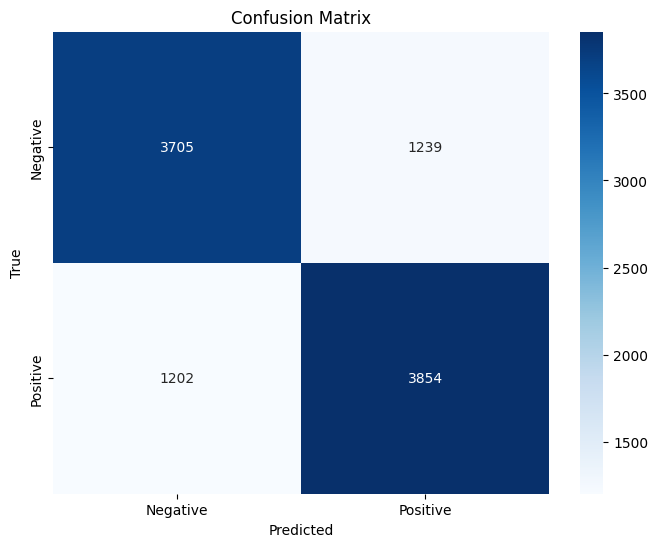

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(padded_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_onehot, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
